In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import platform
import matplotlib as mpl

In [2]:
# OS에 따라 폰트 설정
if platform.system() == "Darwin":  # MacOS
    mpl.rcParams['font.family'] = 'AppleGothic'
elif platform.system() == "Windows":  # Windows
    mpl.rcParams['font.family'] = 'Malgun Gothic'

# 마이너스 기호 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False 

In [3]:
file_url = "../data/(최종)_서울열선_광진도로.csv"
file_encoding = "UTF-8"

In [4]:
df = pd.read_csv(file_url, encoding=file_encoding, low_memory=False)

In [5]:
# 데이터 복사
data = df.copy()

In [11]:
# 사용할 피처 선택 (타겟: '열선' 예측)
features = ['도로폭', '도로규모', '고도의_차이', '경사각', '최근접_시설의_평균거리', 
            '종합_평균_기온', '최근접_시설들_최소거리', '최근접_시설들_최대거리', '생활인구']
target_heat = '열선'

In [12]:
X = df[features].copy()
y_heat = df[target_heat].copy()

In [13]:
# 범주형 변수 인코딩 (라벨 인코딩)
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

In [14]:
# 데이터셋 분리
X_train, X_test, y_train_heat, y_test_heat = train_test_split(X, y_heat, test_size=0.2, random_state=42)

In [15]:
# XGBoost 모델 훈련 (열선 예측)
model_heat = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_heat.fit(X_train, y_train_heat)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [16]:
# 예측 수행 (테스트 데이터)
y_pred_heat = model_heat.predict(X_test)

In [17]:
# 모델 평가 (열선 예측)
accuracy_heat = accuracy_score(y_test_heat, y_pred_heat)
f1_heat = f1_score(y_test_heat, y_pred_heat)
print(f"Heat Prediction - Accuracy: {accuracy_heat:.4f}")
print(f"Heat Prediction - F1 Score: {f1_heat:.4f}")

Heat Prediction - Accuracy: 0.9730
Heat Prediction - F1 Score: 0.9042


In [18]:
# 전체 데이터셋에 대한 예측 수행
data['예측_결과'] = model_heat.predict(X)

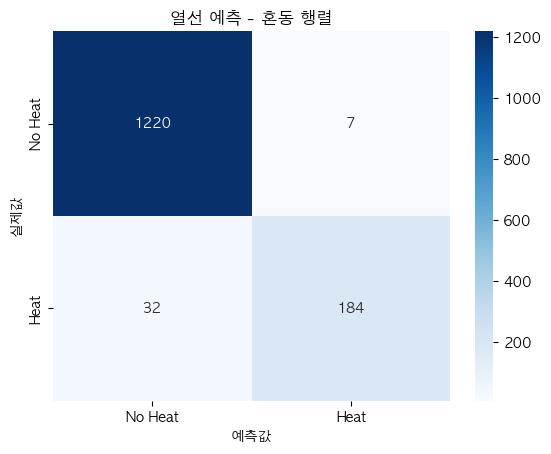

In [19]:
# 혼동 행렬 시각화 (열선 예측)
cm_heat = confusion_matrix(y_test_heat, y_pred_heat)
sns.heatmap(cm_heat, annot=True, fmt='d', cmap='Blues', xticklabels=['No Heat', 'Heat'], yticklabels=['No Heat', 'Heat'])
plt.ylabel('실제값')
plt.xlabel('예측값')
plt.title('열선 예측 - 혼동 행렬')
plt.show()
plt.show()

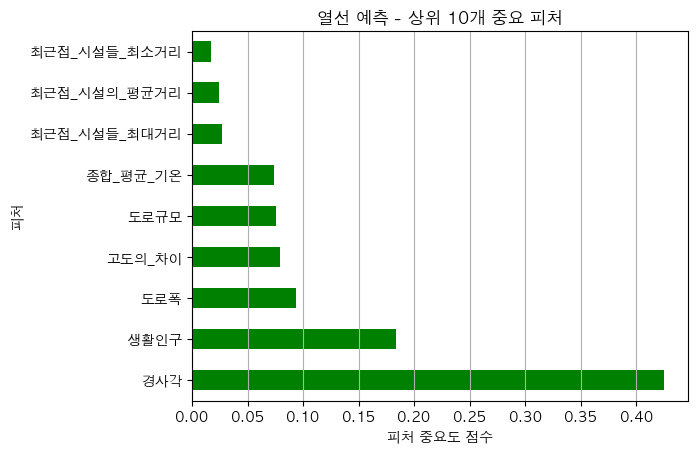

In [20]:
# 피처 중요도 시각화 (열선 예측)
feat_importances_heat = pd.Series(model_heat.feature_importances_, index=features)
feat_importances_heat.nlargest(10).plot(kind='barh', color='green')
plt.xlabel("피처 중요도 점수")
plt.ylabel("피처")
plt.title("열선 예측 - 상위 10개 중요 피처")
plt.grid(axis="x")
plt.show()

In [21]:
data = data.drop(index=data[data["열선"] == 1].index)
data = data.drop(index=data[data["예측_결과"] == 0].index)

In [22]:
try :
    save_url = "./make_file/(XGBoost)_결과.csv"
    data.to_csv(save_url, encoding=file_encoding, index=False)
    print(f"{save_url} 파일 생성 완료.")
except OSError as e :
    print(e)

./make_file/(XGBoost)_결과.csv 파일 생성 완료.
